In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-1/LHC-covid_19_india.csv
/kaggle/input/lhc-on-machine-learning-mu-ict/Book1.csv
/kaggle/input/covid-192/LHC-covid_vaccine_statewise.csv
/kaggle/input/covid19/LHC-population_india_census2011.txt
/kaggle/input/covid19/LHC-covid_19.txt


In [115]:
df=pd.read_csv("/kaggle/input/covid19/LHC-covid_19.txt")

In [116]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [117]:
df.shape

(801, 9)

In [118]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Sno   Date   Time  State/UnionTerritory  ConfirmedIndianNational  \
0    False  False  False                 False                    False   
1    False  False  False                 False                    False   
2    False  False  False                 False                    False   
3    False  False  False                 False                    False   
4    False  False  False                 False                    False   
..     ...    ...    ...                   ...                      ...   
796  False  False  False                 False                    False   
797  False  False  False                 False                    False   
798  False  False  False                 False                    False   
799  False  False  False                 False                    False   
800  False  False  False                 False                    False   

     ConfirmedForeignNational  Cured 

In [119]:
# df.types()

In [120]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
796,797,09/04/20,5:00 PM,Telengana,-,-,35,7,442
797,798,09/04/20,5:00 PM,Tripura,-,-,0,0,1
798,799,09/04/20,5:00 PM,Uttarakhand,-,-,5,0,35
799,800,09/04/20,5:00 PM,Uttar Pradesh,-,-,31,4,410
800,801,09/04/20,5:00 PM,West Bengal,-,-,16,5,103


In [121]:
df['ConfirmedIndianNational'].value_counts()

-      355
1      108
3       73
2       33
4       21
      ... 
41       1
86       1
87       1
45       1
110      1
Name: ConfirmedIndianNational, Length: 62, dtype: int64

In [122]:
df['ConfirmedForeignNational'].value_counts()

-     355
0     314
1      39
2      36
14     25
3      12
10      6
8       5
7       3
6       3
11      2
9       1
Name: ConfirmedForeignNational, dtype: int64

In [123]:
df=df.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Sno','Time'],axis=1)

In [124]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3


In [125]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura'], dtype=object)

In [126]:
df_latest=df[df['Date']=="09/04/20"]
df_latest.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
770,09/04/20,Andhra Pradesh,6,4,348
771,09/04/20,Andaman and Nicobar Islands,0,0,11
772,09/04/20,Arunachal Pradesh,0,0,1
773,09/04/20,Assam,0,0,28
774,09/04/20,Bihar,0,1,39


In [127]:
df_latest['Confirmed'].sum()

5865

In [128]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df['%Cured']=(df['Cured']/df['Confirmed'])*100
df['%Deaths']=(df['Deaths']/df['Confirmed'])*100
df_latest = df_latest.sort_values(by=['Confirmed'],ascending=False)
df_latest.head(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
788,09/04/20,Maharashtra,117,72,1135
795,09/04/20,Tamil Nadu,21,8,738
777,09/04/20,Delhi,21,9,669
796,09/04/20,Telengana,35,7,442
799,09/04/20,Uttar Pradesh,31,4,410
794,09/04/20,Rajasthan,21,3,383
770,09/04/20,Andhra Pradesh,6,4,348
785,09/04/20,Kerala,83,2,345
787,09/04/20,Madhya Pradesh,0,16,259
784,09/04/20,Karnataka,28,5,181


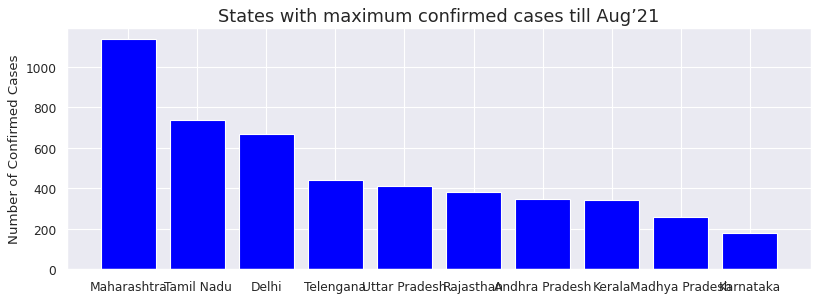

In [129]:
import matplotlib.pyplot as plt
df_latest = df_latest.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(12,4), dpi=80)
plt.bar(df_latest['State/UnionTerritory'][:10], df_latest['Confirmed'][:10],align='center',color='blue')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title("States with maximum confirmed cases till Aug’21", size = 16)
plt.show()

In [130]:
df2=df_latest.copy()
df_Top=df2.head()
df_Top.style.background_gradient(cmap='Blues')

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
788,09/04/20,Maharashtra,117,72,1135
795,09/04/20,Tamil Nadu,21,8,738
777,09/04/20,Delhi,21,9,669
796,09/04/20,Telengana,35,7,442
799,09/04/20,Uttar Pradesh,31,4,410


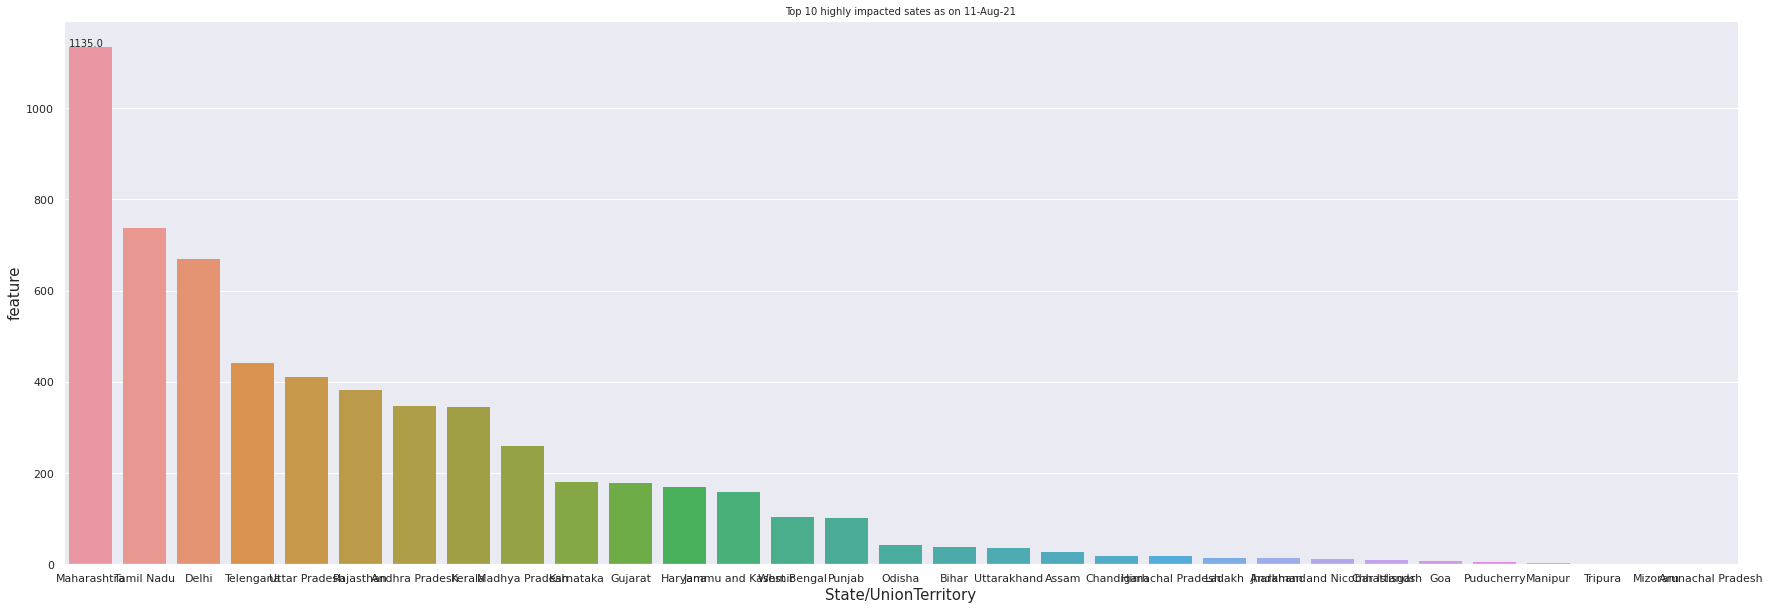

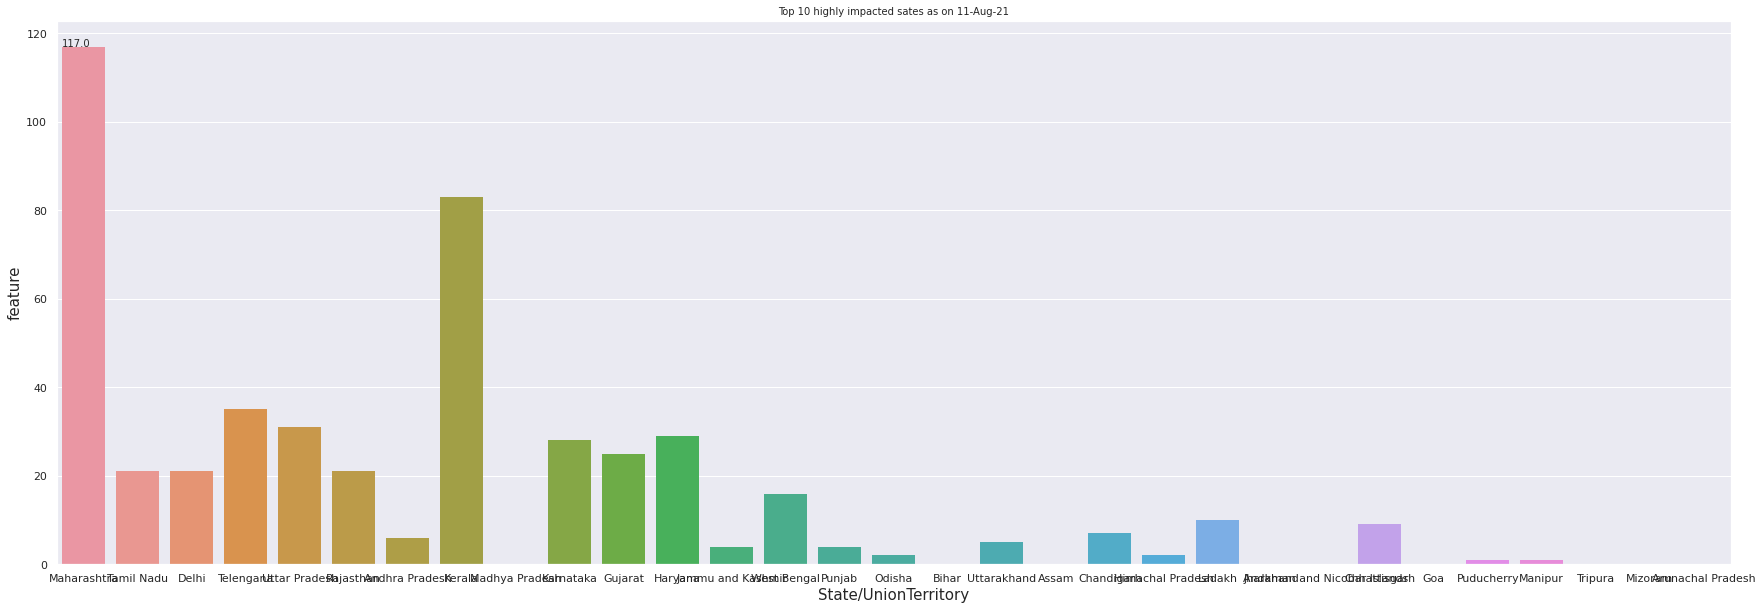

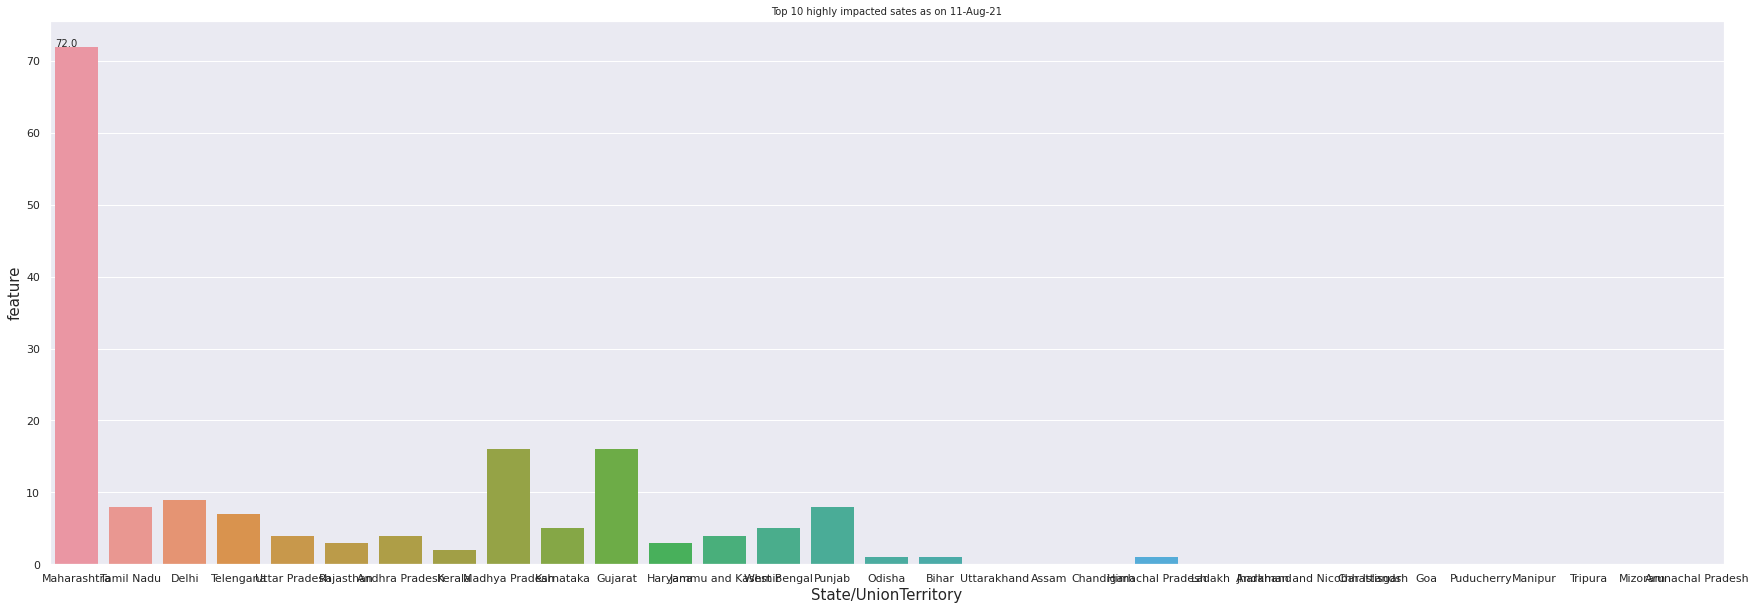

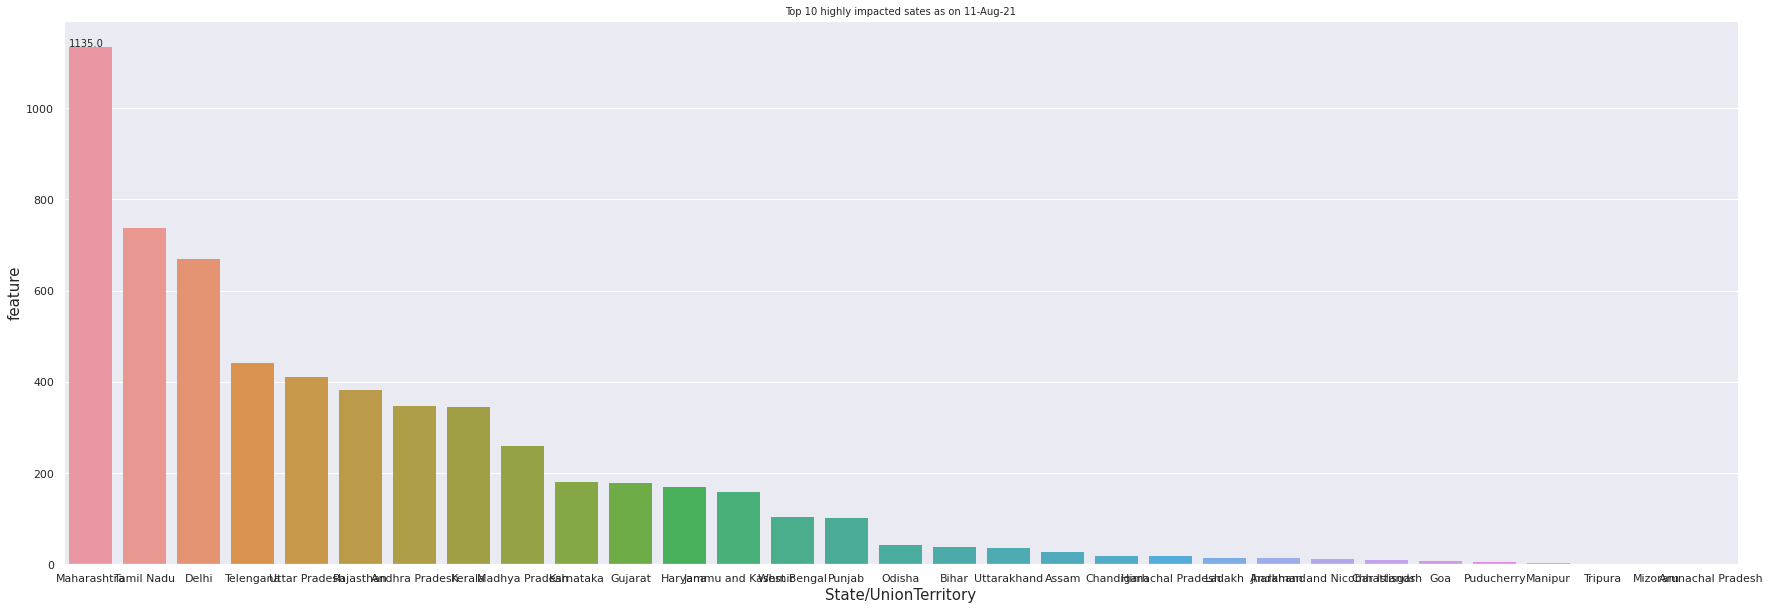

In [131]:
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import plotly.express as px
%matplotlib inline
df2 = df2.sort_values(by=['Confirmed'], ascending = False)
for feature in df2[['Confirmed','Cured','Deaths','Confirmed']]:
    fig=plt.figure(figsize=(30,10))
    plt.title("Top 10 highly impacted sates as on 11-Aug-21", size=10)
    ax=sns.barplot(data=df2,y=df2[feature],x='State/UnionTerritory', linewidth=0, edgecolor='black')
    plt.xlabel('State/UnionTerritory', size = 15)
    plt.ylabel('feature', size = 15)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())
        plt.show()

In [132]:
df_latest['Deaths'].sum()

169

<AxesSubplot:xlabel='Date', ylabel='Confirmed'>

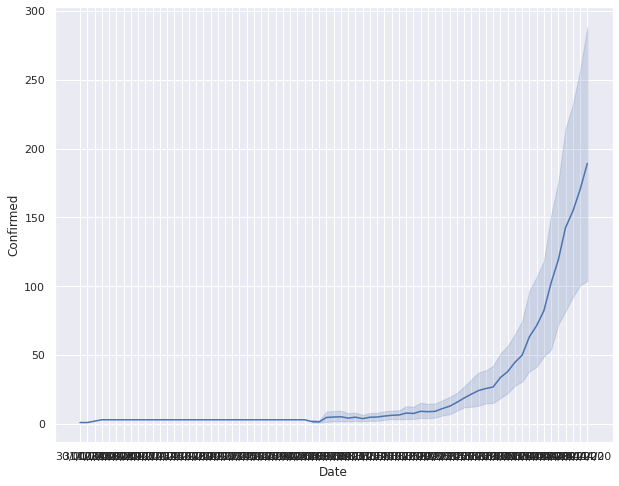

In [133]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(x='Date',y='Confirmed',data=df)

NameError: name 'KR' is not defined

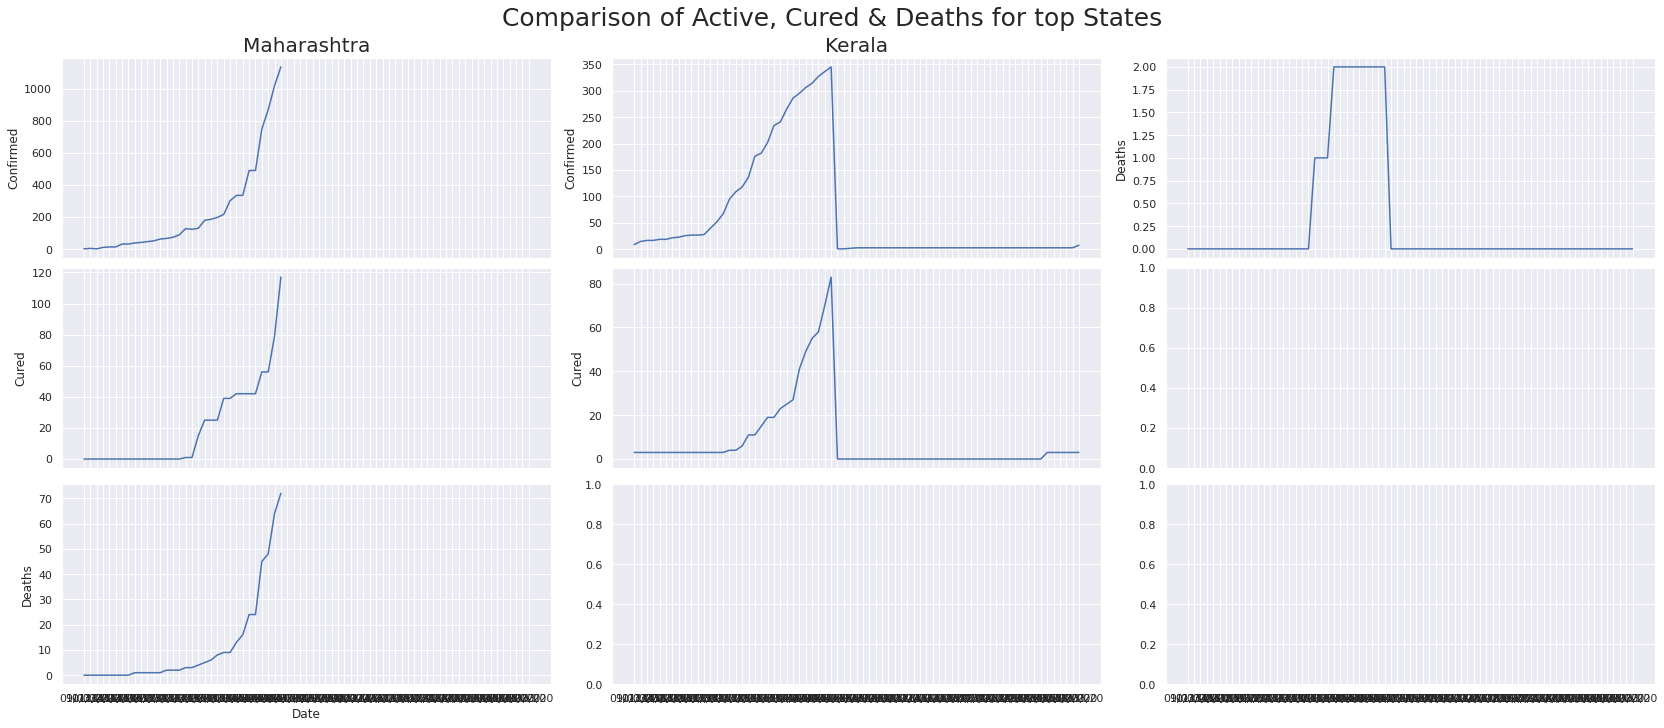

In [134]:
states=['Maharashtra','Tamil Nadu','Delhi','Telengana','Uttar Pradesh','Rajasthan''Andhra Pradesh', 'Kerala', 'Madhya Pradesh', 'Karnataka']
MH = df[df['State/UnionTerritory']=='Maharashtra']
KL = df[df['State/UnionTerritory']=='Kerala']
TN = df[df['State/UnionTerritory']=='Tamil Nadu']
AP = df[df['State/UnionTerritory']=='Andhra Pradesh']
UP = df[df['State/UnionTerritory']=='Uttar Pradesh']
TL = df[df['State/UnionTerritory']=='Telengana']
Delhi = df[df['State/UnionTerritory']=='Delhi']
MP = df[df['State/UnionTerritory']=='Madhya Pradesh']
Rajasthan = df[df['State/UnionTerritory']=='Rajasthan']
fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(23,10),squeeze=False, sharex=True, sharey=False, constrained_layout=True)
plt.suptitle("Comparison of Active, Cured & Deaths for top States",size = 25)
sns.lineplot(data=MH,x='Date',y='Confirmed',ax=ax[0,0],color='b')
ax[0,0].set_title("Maharashtra",size=20)
sns.lineplot(data=MH,x='Date',y='Cured',ax=ax[1,0],color='b')
sns.lineplot(data=MH,x='Date',y='Deaths',ax=ax[2,0],color='b')
sns.lineplot(data=KL,x='Date',y='Confirmed',ax=ax[0,1],color='b')
ax[0,1].set_title("Kerala",size=20)
sns.lineplot(data=KL,x='Date',y='Cured',ax=ax[1,1],color='b')
sns.lineplot(data=KL,x='Date',y='Deaths',ax=ax[0,2],color='b')
sns.lineplot(data=KR,x='Date',y='Confirmed',ax=ax[0,2],color='b')
ax[0,2].set_title("Karnataka",size=20)
sns.lineplot(data=KR,x='Date',y='Cured',ax=ax[1,2],color='b')
sns.lineplot(data=KR, x='Date',y='Deaths', ax=ax[2,2], color='b')
plt.show()

In [135]:
df_latest.shape

(31, 5)

In [136]:
df['Date']=pd.to_datetime(df['Date'])
data_20=df[df["Date"].dt.year==2020]
data_20["Month"]=data_20["Date"].dt.month

In [137]:
data_confirm_20=data_20['Confirmed'].groupby(data_20['Month']).sum()
data_dis_20=data_20['Cured'].groupby(data_20['Month']).sum()
data_death_20=data_20['Deaths'].groupby(data_20['Month']).sum()

In [138]:
data_20['discharge_rate_20'] = np.round((data_20['Cured']/data_20['Confirmed'])*100, decimals=4)
data_20['death_rate_20'] = np.round((data_20['Deaths']/data_20['Confirmed'])*100, decimals=4)

In [139]:
data_20.reset_index(inplace=True)

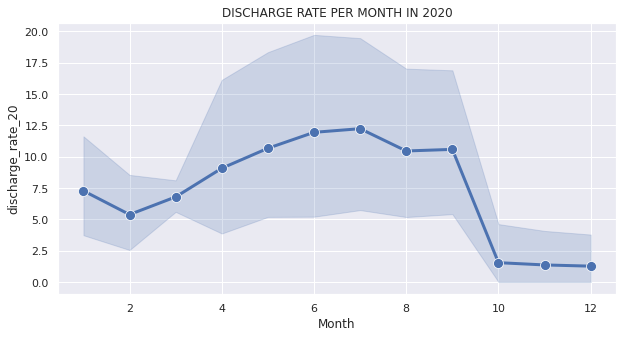

In [140]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_20",data=data_20,color="b",lw=3,marker='o',markersize=10)
plt.title('DISCHARGE RATE PER MONTH IN 2020')
plt.show()

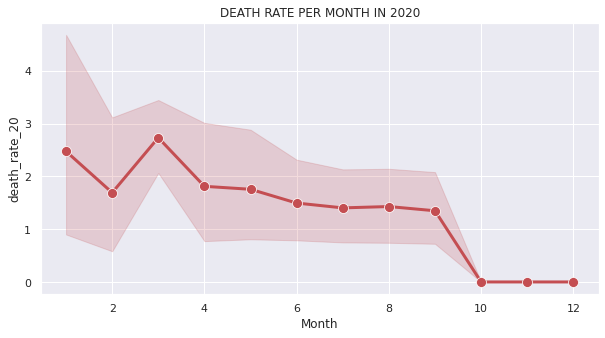

In [141]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_20",data=data_20,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2020')
plt.show()

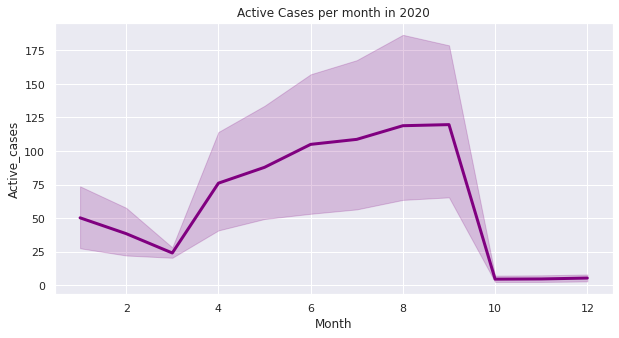

In [142]:
data_20['Active_cases']=data_20['Confirmed']-(data_20['Cured']+data_20['Deaths'])
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="Active_cases",data=data_20,color="purple",lw=3)
plt.title('Active Cases per month in 2020')
plt.show()

In [143]:
states_data = pd.read_csv('/kaggle/input/covid19/LHC-population_india_census2011.txt')
states_data.rename(columns={'State/Union Territory':'States'}, inplace=True)
states_data.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [144]:
states_data.columns

Index(['Sno', 'State / Union Territory', 'Population', 'Rural population',
       'Urban population', 'Area', 'Density', 'Gender Ratio'],
      dtype='object')

In [145]:
states_data = states_data.drop(['Rural population','Urban population','Area','Gender Ratio'], axis = 1)
states_data.head()

,Sno,State / Union Territory,Population,Density
0,1,Uttar Pradesh,199812341,"828/km2 (2,140/sq mi)"
1,2,Maharashtra,112374333,365/km2 (950/sq mi)
2,3,Bihar,104099452,"1,102/km2 (2,850/sq mi)"
3,4,West Bengal,91276115,"1,029/km2 (2,670/sq mi)"
4,5,Madhya Pradesh,72626809,236/km2 (610/sq mi)


In [146]:
states_data.rename(columns={'State / Union Territory':'States'}, inplace=True)
states_data.head()

,Sno,States,Population,Density
0,1,Uttar Pradesh,199812341,"828/km2 (2,140/sq mi)"
1,2,Maharashtra,112374333,365/km2 (950/sq mi)
2,3,Bihar,104099452,"1,102/km2 (2,850/sq mi)"
3,4,West Bengal,91276115,"1,029/km2 (2,670/sq mi)"
4,5,Madhya Pradesh,72626809,236/km2 (610/sq mi)


In [147]:
df_latest.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed'], dtype='object')

In [148]:
states_data=states_data.sort_values(by=['Population'],ascending=False)
states_data.head()

,Sno,States,Population,Density
0,1,Uttar Pradesh,199812341,"828/km2 (2,140/sq mi)"
1,2,Maharashtra,112374333,365/km2 (950/sq mi)
2,3,Bihar,104099452,"1,102/km2 (2,850/sq mi)"
3,4,West Bengal,91276115,"1,029/km2 (2,670/sq mi)"
4,5,Madhya Pradesh,72626809,236/km2 (610/sq mi)


In [149]:
states_data.isna().sum()

Sno           0
States        0
Population    0
Density       0
dtype: int64

In [150]:
states_data.duplicated().sum()

0

In [151]:
states_data = states_data.drop(['Sno'], axis = 1)
states_data.head()

,States,Population,Density
0,Uttar Pradesh,199812341,"828/km2 (2,140/sq mi)"
1,Maharashtra,112374333,365/km2 (950/sq mi)
2,Bihar,104099452,"1,102/km2 (2,850/sq mi)"
3,West Bengal,91276115,"1,029/km2 (2,670/sq mi)"
4,Madhya Pradesh,72626809,236/km2 (610/sq mi)


In [152]:
Vaccination = pd.read_csv("/kaggle/input/covid-192/LHC-covid_vaccine_statewise.csv")
Vaccination.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [153]:
Vaccination.columns

Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

In [154]:
Vaccine_drive= Vaccination.copy()
Vaccine_drive= Vaccine_drive.iloc[:,[0,1,2,23]]
Vaccine_drive

,Updated On,State,Total Doses Administered,Total Individuals Vaccinated
0,16/01/2021,India,48276.0,48276.0
1,17/01/2021,India,58604.0,58604.0
2,18/01/2021,India,99449.0,99449.0
3,19/01/2021,India,195525.0,195525.0
4,20/01/2021,India,251280.0,251280.0
...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN


In [155]:
Vaccine_drive.rename(columns={'Updated On':'Date'}, inplace=True)
Vaccine_drive.rename(columns={'Total Doses Administered':'Total_Doses'}, inplace=True)
Vaccine_drive.rename(columns={'Total Individuals Vaccinated':'Citizens'}, inplace=True)
Vaccine_drive.head()

,Date,State,Total_Doses,Citizens
0,16/01/2021,India,48276.0,48276.0
1,17/01/2021,India,58604.0,58604.0
2,18/01/2021,India,99449.0,99449.0
3,19/01/2021,India,195525.0,195525.0
4,20/01/2021,India,251280.0,251280.0


In [156]:
Vaccine_drive.shape

(7845, 4)

In [157]:
Vaccine_drive.isna().sum()

Date              0
State             0
Total_Doses     224
Citizens       1926
dtype: int64

In [158]:
vaccine_drive=Vaccine_drive.drop(['State',"Citizens"],axis=1)
vaccine_drive.head()

,Date,Total_Doses
0,16/01/2021,48276.0
1,17/01/2021,58604.0
2,18/01/2021,99449.0
3,19/01/2021,195525.0
4,20/01/2021,251280.0


In [159]:
Vaccine_drive= Vaccine_drive.dropna()
Vaccine_drive.isna().sum()

Date           0
State          0
Total_Doses    0
Citizens       0
dtype: int64

In [160]:
Vaccine_drive['Total_Doses'].max()

303426850.0

In [161]:
Vaccine_drive=Vaccine_drive[Vaccine_drive.Total_Doses != 513228400]
Vaccine_drive.max()

Date            31/05/2021
State          West Bengal
Total_Doses    303426850.0
Citizens       250656880.0
dtype: object

In [162]:
vaccine_drive.tail()

,Date,Total_Doses
7840,11/08/2021,NaN
7841,12/08/2021,NaN
7842,13/08/2021,NaN
7843,14/08/2021,NaN
7844,15/08/2021,NaN


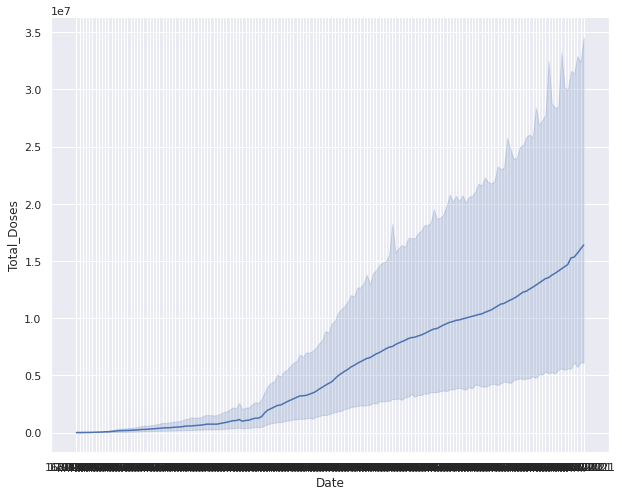

In [163]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(x='Date', y='Total_Doses', data=Vaccine_drive)
plt.show()

NameError: name 'KR' is not defined

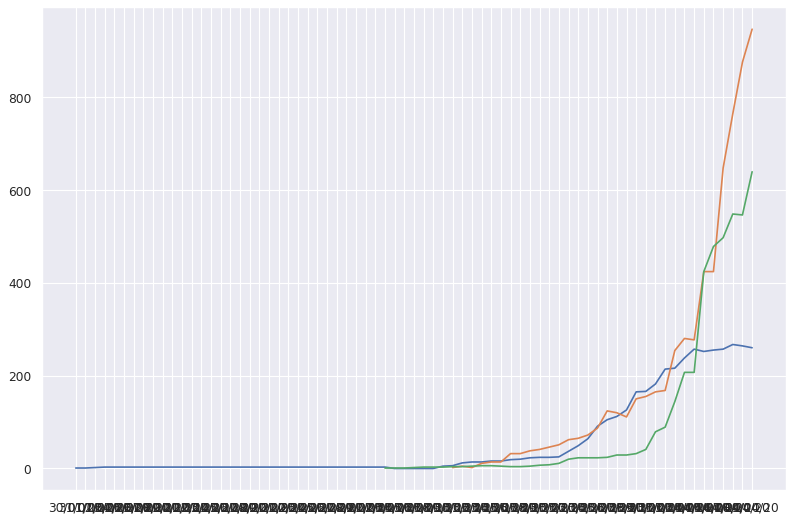

In [164]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(KL['Date'], KL['Active_cases'])
plt.plot(MH['Date'], MH['Active_cases'])
plt.plot(Delhi['Date'], Delhi['Active_cases'])
plt.plot(KR['Date'], KR['Active_cases'])
plt.plot(TN['Date'], TN['Active_cases'])
plt.plot(UP['Date'], UP['Active_cases'])
plt.plot(AP['Date'], AP['Active_cases'])
plt.plot(Odisha['Date'], Odisha['Active_cases'])
plt.legend(['Kerala', 'Maharashtra', 'Delhi', 'Karnataka', 'Tamil Nadu', 'UP', 'WB', 'AP','Chhatisgarh','Odisha'], loc='upper left')
plt.xlabel('Date', size=12)
plt.ylabel('Active Cases Count', size=12)
plt.title('Which states are flattening the curve ?', size = 16)
plt.show()